In [133]:
import numpy as np
import pandas as pd

In [134]:
path="diabets.csv"

In [135]:
df= pd.read_csv(path)

In [136]:
df.head()

,has_diabetes,Gender,Age,BMI,Weight,Height
0,0.0,male,34,32.22,87.4,164.7
1,0.0,male,34,32.22,87.4,164.7
2,0.0,male,34,32.22,87.4,164.7
3,0.0,male,4,15.30,17.0,105.4
4,0.0,female,49,30.57,86.7,168.4


In [137]:
df.shape

(10000, 6)

In [138]:
df.isna().sum()

has_diabetes    142
Gender            0
Age               0
BMI             366
Weight           78
Height          353
dtype: int64

In [139]:
df = df.dropna(subset=['has_diabetes'], how='all')

In [140]:
df.isna().sum()

has_diabetes      0
Gender            0
Age               0
BMI             229
Weight           78
Height          216
dtype: int64

In [141]:
df.shape

(9858, 6)

In [142]:
updated_df["has_diabetes"].value_counts()

0.0    9098
1.0     760
Name: has_diabetes, dtype: int64

In [143]:
df.describe()

,has_diabetes,Age,BMI,Weight,Height
count,9858.000000,9858.000000,9629.000000,9780.000000,9642.000000
mean,0.077095,37.254108,26.658597,71.869969,161.882960
std,0.266755,22.124204,7.375275,28.346631,20.190297
min,0.000000,1.000000,12.880000,8.000000,83.600000
25%,0.000000,18.000000,21.580000,57.100000,156.800000
50%,0.000000,37.000000,25.980000,73.100000,166.000000
75%,0.000000,54.000000,30.890000,89.100000,174.500000
max,1.000000,80.000000,81.250000,230.700000,200.400000


In [144]:
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['Weight']=df['Weight'].fillna(df['Weight'].mean())
df['Height']=df['Height'].fillna(df['Height'].mean())


In [145]:
df.isna().sum()

has_diabetes    0
Gender          0
Age             0
BMI             0
Weight          0
Height          0
dtype: int64

In [146]:
df.head()

,has_diabetes,Gender,Age,BMI,Weight,Height
0,0.0,male,34,32.22,87.4,164.7
1,0.0,male,34,32.22,87.4,164.7
2,0.0,male,34,32.22,87.4,164.7
3,0.0,male,4,15.30,17.0,105.4
4,0.0,female,49,30.57,86.7,168.4


In [147]:
df = pd.get_dummies(df, prefix=None)

In [148]:
df.head()

,has_diabetes,Age,BMI,Weight,Height,Gender_female,Gender_male
0,0.0,34,32.22,87.4,164.7,0,1
1,0.0,34,32.22,87.4,164.7,0,1
2,0.0,34,32.22,87.4,164.7,0,1
3,0.0,4,15.30,17.0,105.4,0,1
4,0.0,49,30.57,86.7,168.4,1,0


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns 

<AxesSubplot:ylabel='Weight'>

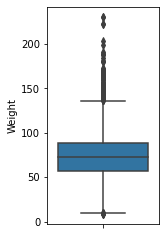

In [150]:
plt.figure(figsize = (2,4))
sns.boxplot(y = df.Weight)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   has_diabetes   9858 non-null   float64
 1   Age            9858 non-null   int64  
 2   BMI            9858 non-null   float64
 3   Weight         9858 non-null   float64
 4   Height         9858 non-null   float64
 5   Gender_female  9858 non-null   uint8  
 6   Gender_male    9858 non-null   uint8  
dtypes: float64(4), int64(1), uint8(2)
memory usage: 481.3 KB


In [152]:
df.head()

,has_diabetes,Age,BMI,Weight,Height,Gender_female,Gender_male
0,0.0,34,32.22,87.4,164.7,0,1
1,0.0,34,32.22,87.4,164.7,0,1
2,0.0,34,32.22,87.4,164.7,0,1
3,0.0,4,15.30,17.0,105.4,0,1
4,0.0,49,30.57,86.7,168.4,1,0


In [153]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [154]:
updated_old = df.copy()
updated_df2 = df.copy()
for i in df.columns:
    if i !="has_diabetes": 
        if i !="Gender_male":
            if i !="Gender_female": 
                print("\n"+i)
                out_iqr(df,i)
                updated_df2 = updated_df2[(updated_df2[i] < upper) & (updated_df2[i] > lower)]


Age
The IQR is 36.0
The lower bound value is -36.0
The upper bound value is 108.0
Total number of outliers are 0

BMI
The IQR is 9.02
The lower bound value is 8.17
The upper bound value is 44.25
Total number of outliers are 201

Weight
The IQR is 31.799999999999997
The lower bound value is 9.500000000000007
The upper bound value is 136.7
Total number of outliers are 142

Height
The IQR is 17.17500000000001
The lower bound value is 131.43749999999997
The upper bound value is 200.13750000000002
Total number of outliers are 889


In [157]:
updated_old.shape

(9858, 7)

In [158]:
updated_df2.shape

(8725, 7)

In [159]:
updated_df2.head()

,has_diabetes,Age,BMI,Weight,Height,Gender_female,Gender_male
0,0.0,34,32.22,87.4,164.7,0,1
1,0.0,34,32.22,87.4,164.7,0,1
2,0.0,34,32.22,87.4,164.7,0,1
4,0.0,49,30.57,86.7,168.4,1,0
5,0.0,9,16.82,29.8,133.1,0,1


In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [167]:
x = updated_df2.drop(["Height","Weight","has_diabetes"],axis=1)
y = updated_df2["has_diabetes"]

In [168]:
x.head()

,Age,BMI,Gender_female,Gender_male
0,34,32.22,0,1
1,34,32.22,0,1
2,34,32.22,0,1
4,49,30.57,1,0
5,9,16.82,0,1


In [169]:
y.head()

0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
Name: has_diabetes, dtype: float64

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [173]:
updated_df2[["Age","BMI","Gender_female","Gender_male"]]=scaler.fit_transform(x)

In [174]:
updated_df2.head()

,has_diabetes,Age,BMI,Weight,Height,Gender_female,Gender_male
0,0.0,-0.312786,0.874997,87.4,164.7,-1.006554,1.006554
1,0.0,-0.312786,0.874997,87.4,164.7,-1.006554,1.006554
2,0.0,-0.312786,0.874997,87.4,164.7,-1.006554,1.006554
4,0.0,0.413194,0.594069,86.7,168.4,0.993488,-0.993488
5,0.0,-1.522752,-1.746998,29.8,133.1,-1.006554,1.006554


In [179]:
updated_df2.describe()

,has_diabetes,Age,BMI,Weight,Height,Gender_female,Gender_male
count,8725.000000,8.725000e+03,8.725000e+03,8725.000000,8725.000000,8.725000e+03,8.725000e+03
mean,0.080573,6.914558e-17,-1.519033e-16,75.322749,166.968614,-1.009826e-16,9.105737e-17
std,0.272194,1.000057e+00,1.000057e+00,21.762802,11.331716,1.000057e+00,1.000057e+00
min,0.000000,-1.909941e+00,-2.414415e+00,9.600000,131.500000,-1.006554e+00,-9.934882e-01
25%,0.000000,-8.451706e-01,-7.203334e-01,61.500000,160.000000,-1.006554e+00,-9.934882e-01
50%,0.000000,-2.239373e-02,-7.188387e-02,74.800000,167.200000,9.934882e-01,-9.934882e-01
75%,0.000000,7.519845e-01,6.332290e-01,89.300000,175.100000,9.934882e-01,1.006554e+00
max,1.000000,1.913552e+00,2.914705e+00,136.300000,199.900000,9.934882e-01,1.006554e+00


In [180]:
updated_df2 = updated_df2.drop(["Height","Weight",],axis=1)

In [181]:
updated_df2.head()

,has_diabetes,Age,BMI,Gender_female,Gender_male
0,0.0,-0.312786,0.874997,-1.006554,1.006554
1,0.0,-0.312786,0.874997,-1.006554,1.006554
2,0.0,-0.312786,0.874997,-1.006554,1.006554
4,0.0,0.413194,0.594069,0.993488,-0.993488
5,0.0,-1.522752,-1.746998,-1.006554,1.006554


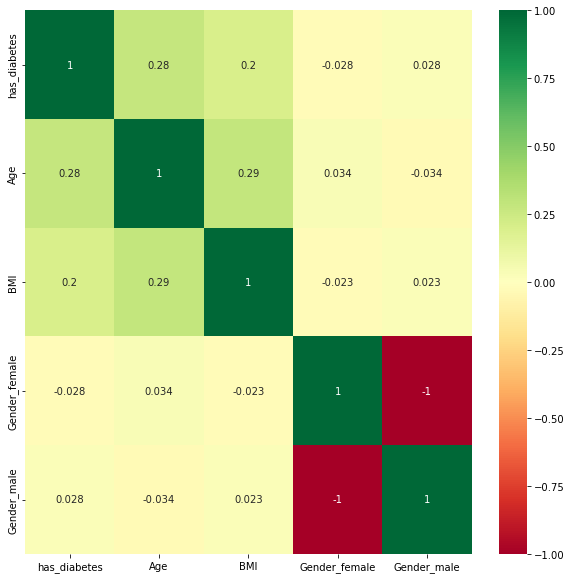

In [182]:
#get correlations of each features in dataset
corrmat = updated_df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(updated_df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [183]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [195]:
updated_df2.head()

,has_diabetes,Age,BMI,Gender_female,Gender_male
0,0.0,-0.312786,0.874997,-1.006554,1.006554
1,0.0,-0.312786,0.874997,-1.006554,1.006554
2,0.0,-0.312786,0.874997,-1.006554,1.006554
4,0.0,0.413194,0.594069,0.993488,-0.993488
5,0.0,-1.522752,-1.746998,-1.006554,1.006554


In [188]:
X = updated_df2.drop(["has_diabetes"],axis=1)
y= updated_df2["has_diabetes"]

In [189]:
X.head()

,Age,BMI,Gender_female,Gender_male
0,-0.312786,0.874997,-1.006554,1.006554
1,-0.312786,0.874997,-1.006554,1.006554
2,-0.312786,0.874997,-1.006554,1.006554
4,0.413194,0.594069,0.993488,-0.993488
5,-1.522752,-1.746998,-1.006554,1.006554


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
Name: has_diabetes, dtype: float64

In [196]:
df.shape

(9858, 7)

In [200]:
train_data = updated_df2[:7000]
test_data = updated_df2[7000:]

In [201]:
# Prepare training and test data
train_X = train_data.drop('has_diabetes', axis=1)
train_y = train_data['has_diabetes']
test_X = test_data.drop('has_diabetes', axis=1)
test_y = test_data['has_diabetes']

In [202]:
# Fit logistic regression model
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [225]:
# Find coefficients and intercept
coef = model.coef_
intercept = model.intercept_

In [226]:
# Make predictions on test data
pred_y = model.predict(test_X)

In [227]:
# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(test_y, pred_y).ravel()

In [208]:
accuracy = (tp + tn) / (tp + tn + fp + fn)

In [209]:
print('Coefficients:', coef)
print('Intercept:', intercept)
print('True positives:', tp)
print('True negatives:', tn)
print('False positives:', fp)
print('False negatives:', fn)
print('Accuracy:', accuracy)

Coefficients: [[ 1.22642436  0.66440429 -0.10526153  0.10526153]]
Intercept: [-3.29584609]
True positives: 5
True negatives: 1584
False positives: 2
False negatives: 134
Accuracy: 0.9211594202898551


In [213]:
cm = confusion_matrix(test_y, pred_y).ravel()
print("Confusion matrix:")
print(cm)

Confusion matrix:
[1584    2  134    5]


In [220]:

from sklearn import datasets, linear_model, metrics

In [222]:
# create logistic regression object
reg = linear_model.LogisticRegression()
   
# train the model using the training sets
reg.fit(train_X, train_y)
  
# making predictions on the testing set
y_pred = reg.predict(test_X)
   

In [224]:

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):", 
metrics.accuracy_score(test_y, y_pred)*100)

Logistic Regression model accuracy(in %): 92.11594202898551
